### Student Information
Name: 許承恩

Student ID: 112065519

GitHub ID: theirenehsu

## Table of Contents
1. Part 1 - Lab Exercises

2. Part 2 - DM on the new dataset

    - 2.1 Data Preparation

    - 2.2 Data Transformation

    - 2.3 Data Mining using Pandas

    - 2.4 Data Preprocessing

    - 2.5 Data Exploration

3. Part 3

    - 3.1 New Data Visualization

    - 3.2 TF-IDF Features

    - 3.3 Naive Bayes Classifier

        - MultinomialNB

            - Using TF-IDF Features

            - Using Word Frequency Features
        
        - GaussianNB

            - Using TF-IDF Features

            - Using Word Frequency Features
        
        - Conclusion
        
4. Part 4 - Observations

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

# Part 1

In [356]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [357]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import helpers.data_mining_helpers as dmh

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
X.iloc[::-1, [0,2]]
X.query('category == 1')
# X_mask = X.mask( X['category'] == 1)
# X_mask[:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
11,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...,1,comp.graphics
14,From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...,1,comp.graphics
15,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,1,comp.graphics
...,...,...,...
2232,From: lipman@oasys.dt.navy.mil (Robert Lipman)...,1,comp.graphics
2236,From: dkusswur@falcon.depaul.edu (Daniel C. Ku...,1,comp.graphics
2241,From: dls@aeg.dsto.gov.au (David Silver) Subje...,1,comp.graphics
2242,From: Sean McMains <mcmains@unt.edu> Subject: ...,1,comp.graphics


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [358]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [359]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

**ANSWER** 

A, B, and E have valid representations (np.nan, None, and empty) of a missing value in Pandas, 

so the isnull() function returned True.

However, C, D, and F have the string 'NaN', 'None', and '', 

which aren't proper representations of a missing value in Pandas,

so the isnull() function returned False.

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

**ANSWER**

X_sample dataframe is the subset of X dataframe and contains data rows randomly selected from X dataframe.

Any change made to X_sample dataframe won't affect X dataframe.

The result generated each time will not be the same unless random_state parameter is used.

### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

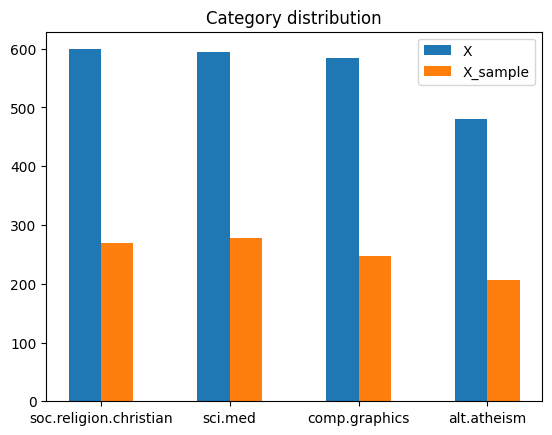

In [360]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X_sample = X.sample(n=1000, random_state=42) 


data1 = []
for a in X.category_name.value_counts().sort_index(ascending=False):
    data1.append(a)

data2 = []
for b in X_sample.category_name.value_counts().sort_index(ascending=False):
    data2.append(b)

width = 0.25
x = np.arange(len(categories))

plt.bar(x - width/2, data1, width, label='X')
plt.bar(x + width/2, data2, width, label='X_sample')

plt.title('Category distribution')
plt.xticks(x, sorted(categories, reverse=True))
plt.legend()

plt.show()

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [361]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

arr = (X_counts[4, 0:100].toarray())
num = np.where(arr[0] == 1)
count_vect.get_feature_names_out()[num][1]

'01'

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

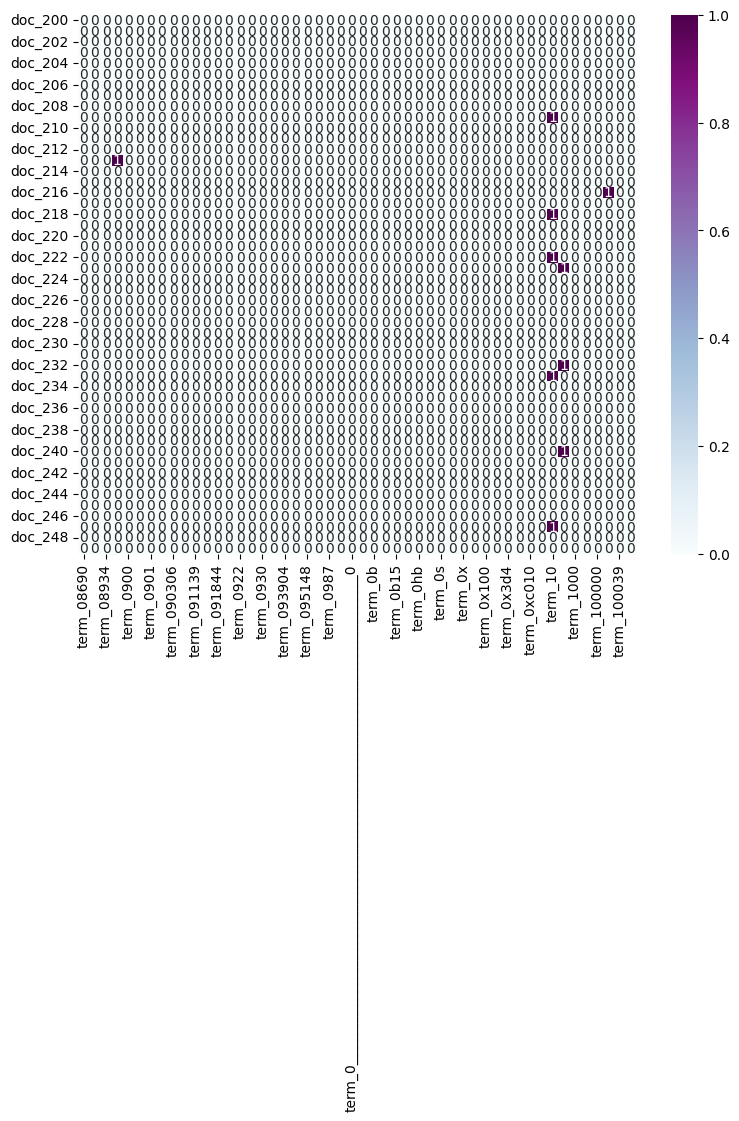

In [362]:
import seaborn as sns

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[200:250]]
# print(plot_x)

plot_y = ["doc_"+ str(i) for i in list(X.index)[200:250]]
# print(plot_y)

plot_z = X_counts[200:250, 200:250].toarray() 
# print(plot_z)

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
# display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="BuPu",
                 vmin=0, vmax=1, annot=True)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

**ANSWER**

When a scatterplot transitions from 2D to 3D, the addition of an extra dimension allows for more accurate distance observations. 

Ｗhen viewed from different angles, the distances observed in 2D differ from those in the 3D plot. 

Some pairs of points that appear close in the 2D plot reveal greater distances between them once transformed into a 3D representation.

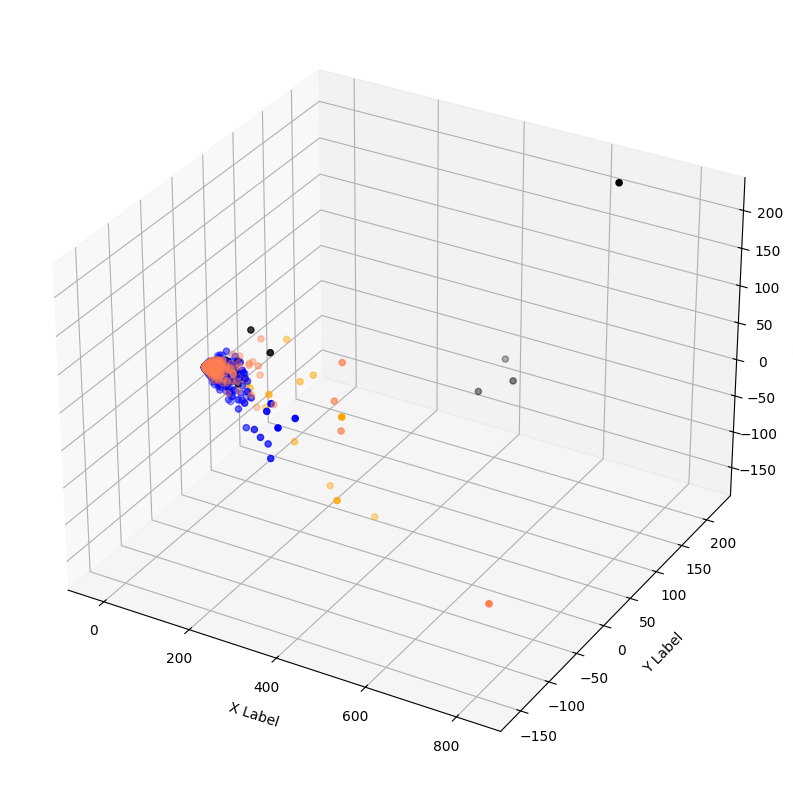

In [363]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d.axes3d import Axes3D

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = '3d')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

# angle1
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    
    ax.scatter3D(xs, ys, zs, c = c, marker='o')

ax.view_init()
plt.show()

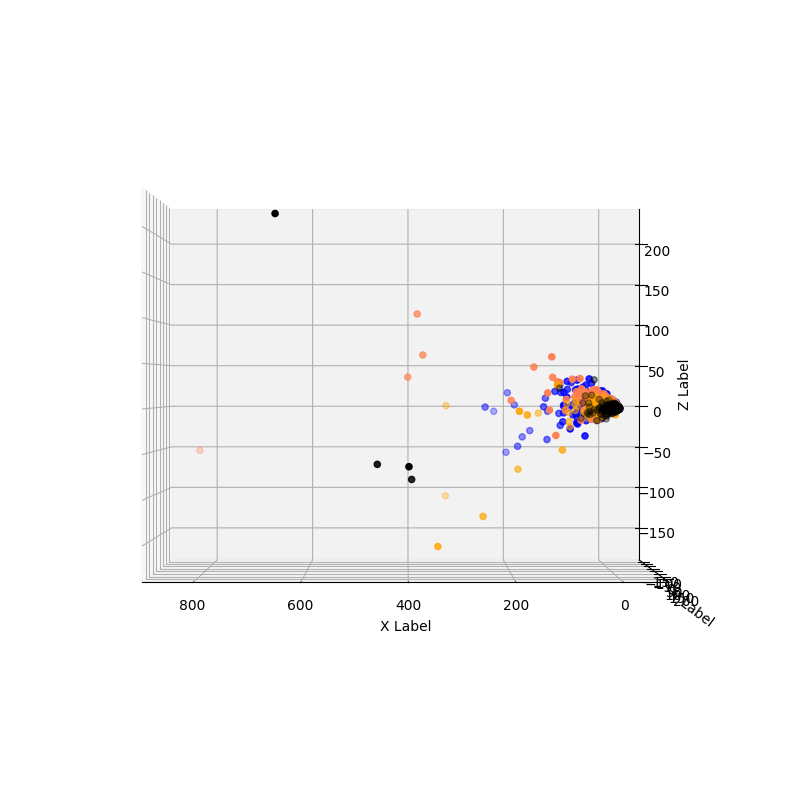

In [364]:
# plot
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = '3d')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

# angle2
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    
    ax.scatter3D(xs, ys, zs, c = c, marker='o')

ax.view_init(0, 90)
plt.show()

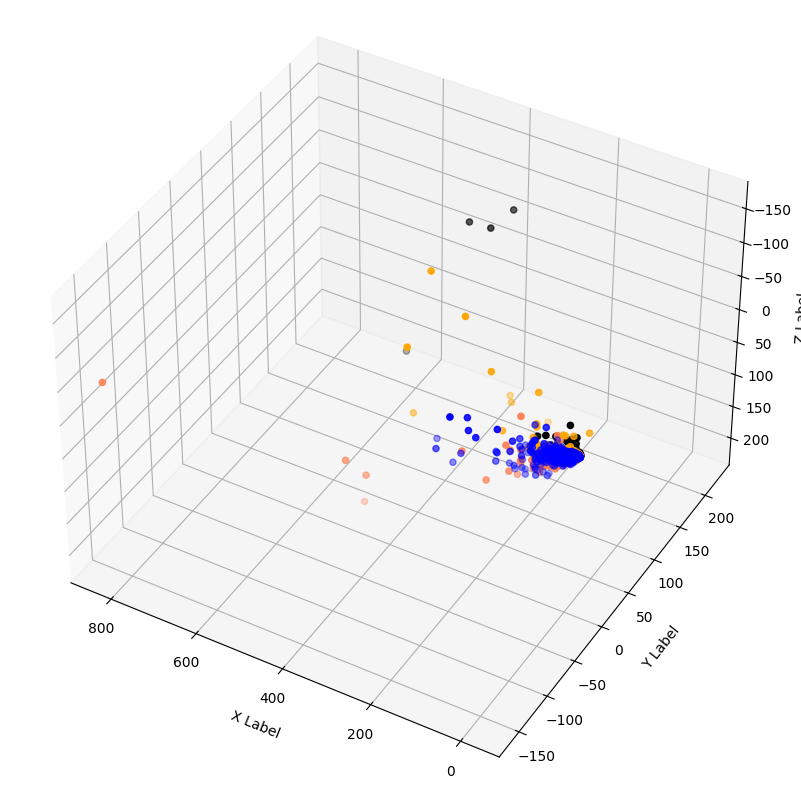

In [365]:
# plot
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = '3d')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

# angle3
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    
    ax.scatter3D(xs, ys, zs, c = c, marker='o')

ax.view_init(-140, 60)
plt.show()

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [366]:
import plotly.express as plot_ex

term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
    
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

data = {
    'Terms': count_vect.get_feature_names_out()[:300],
    'Frequencies': term_frequencies[:300]
}
df = pd.DataFrame(data)

fig = plot_ex.bar(df, x='Terms', y='Frequencies')
fig.update_xaxes(tickangle=90)

fig.show()

### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [367]:
# If I want to visualize terms with frequency > 1000
num = 1000

filtered_data = {
    'Terms': [term for term, freq in zip(count_vect.get_feature_names_out(), term_frequencies) if freq > num],
    'Frequencies': [freq for freq in term_frequencies if freq > num]
}
df_filtered = pd.DataFrame(filtered_data)

fig = plot_ex.bar(df_filtered, x='Terms', y='Frequencies')
fig.update_xaxes(tickangle=90)

fig.show()

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [368]:
sorted_terms = [term for _, term in sorted(zip(term_frequencies, count_vect.get_feature_names_out()), reverse=True)]
sorted_frequencies = sorted(term_frequencies, reverse=True)

data = {
    'Terms': sorted_terms[0:300],
    'Frequencies': sorted_frequencies[0:300]
}
df = pd.DataFrame(data)

fig = plot_ex.bar(df, x='Terms', y='Frequencies')
fig.update_xaxes(tickangle=90)

fig.show()

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [369]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"


# Part 2

## 1. Data Preparation

In [370]:
# Combine three labelled datasets
filenames = ['amazon_cells_labelled.txt', 'imdb_labelled.txt', 'yelp_labelled.txt']
with open('combined_labelled.txt', 'w') as outfile:
    for f_name in filenames:
        with open(f_name) as infile:
            for line in infile:
                outfile.write(line)

In [371]:
data = {}
data['text'] = []
data['score'] = []

with open('combined_labelled.txt', 'r') as fin:
    for line in fin:
        a = line.split('\t')
        data['text'].append(a[0])
        a[1] = a[1].split('\n')
        data['score'].append(a[1][0])


## 2. Data Transformation

In [372]:
import pandas as pd
X = pd.DataFrame(data)
X[:10]

,text,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [373]:
categories = ['positive', 'negtive']

def set_category(score):
    if score == '1':
        return 'positive'
    else:
        return 'negtive'
    
X['category'] = X['score'].apply(set_category)
X

,text,score,category
0,So there is no way for me to plug it in here i...,0,negtive
1,"Good case, Excellent value.",1,positive
2,Great for the jawbone.,1,positive
3,Tied to charger for conversations lasting more...,0,negtive
4,The mic is great.,1,positive
...,...,...,...
2995,I think food should have flavor and texture an...,0,negtive
2996,Appetite instantly gone.,0,negtive
2997,Overall I was not impressed and would not go b...,0,negtive
2998,"The whole experience was underwhelming, and I ...",0,negtive


## 3. Data Mining using Pandas

In [374]:
# Check missing values
import helpers.data_mining_helpers as dmh
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,category
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [375]:
# Check duplicated values
sum(X.duplicated())

17

In [376]:
X.drop_duplicates(keep=False, inplace=True)
len(X)

2966

## 4. Data Preprocessing

In [377]:
print(X.shape)
X_sample = X.sample(n=1000, random_state=42) #random state
display(X_sample.shape)

(2966, 3)


(1000, 3)

In [378]:
import matplotlib.pyplot as plt
%matplotlib inline

score
0    1486
1    1480
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='score'>

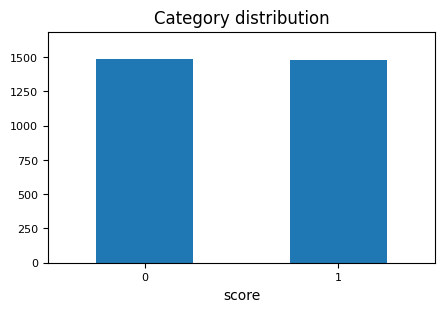

In [379]:
print(X.score.value_counts())
upper_bound = max(X.score.value_counts() + 200) 

# plot barchart for X
X.score.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 8, figsize = (5,3))

score
1    532
0    468
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='score'>

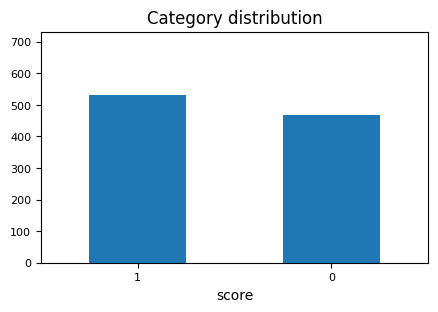

In [380]:
print(X_sample.score.value_counts())
upper_bound = max(X_sample.score.value_counts() + 200) 

# plot barchart for X_sample
X_sample.score.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 8, figsize = (5,3))

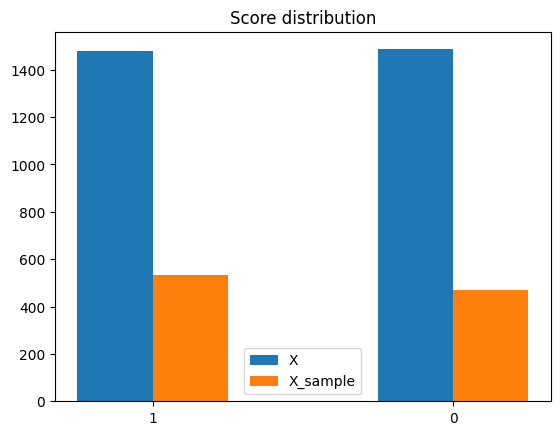

In [381]:
import numpy as np

data1 = []
for a in X.score.value_counts().sort_index(ascending=False):
    data1.append(a)

data2 = []
for b in X_sample.score.value_counts().sort_index(ascending=False):
    data2.append(b)

scores = ['0', '1']
width = 0.25
x = np.arange(len(scores))

plt.bar(x - width/2, data1, width, label='X')
plt.bar(x + width/2, data2, width, label='X_sample')

plt.title('Score distribution')
plt.xticks(x, sorted(scores, reverse=True))
plt.legend()

plt.show()

In [382]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/irenehsu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [383]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
X[0:10]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
4                             [The, mic, is, great, .]
5    [I, have, to, jiggle, the, plug, to, get, it, ...
6    [If, you, have, several, dozen, or, several, h...
7    [If, you, are, Razr, owner, ..., you, must, ha...
8      [Needless, to, say, ,, I, wasted, my, money, .]
9         [What, a, waste, of, money, and, time, !, .]
Name: unigrams, dtype: object

In [384]:
X[0:20]

,text,score,category,unigrams
0,So there is no way for me to plug it in here i...,0,negtive,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,negtive,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,positive,"[The, mic, is, great, .]"
5,I have to jiggle the plug to get it to line up...,0,negtive,"[I, have, to, jiggle, the, plug, to, get, it, ..."
6,If you have several dozen or several hundred c...,0,negtive,"[If, you, have, several, dozen, or, several, h..."
7,If you are Razr owner...you must have this!,1,positive,"[If, you, are, Razr, owner, ..., you, must, ha..."
8,"Needless to say, I wasted my money.",0,negtive,"[Needless, to, say, ,, I, wasted, my, money, .]"
9,What a waste of money and time!.,0,negtive,"[What, a, waste, of, money, and, time, !, .]"


In [385]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
# print(X_counts)
print(X_counts.shape)
print(X_counts[0])

(2966, 5153)
  (0, 4159)	1
  (0, 4543)	1
  (0, 2426)	1
  (0, 3042)	1
  (0, 4985)	1
  (0, 1828)	1
  (0, 2808)	1
  (0, 4607)	1
  (0, 3385)	1
  (0, 2431)	1
  (0, 2313)	2
  (0, 2157)	1
  (0, 4529)	1
  (0, 4833)	1
  (0, 4791)	1
  (0, 1981)	1
  (0, 646)	1
  (0, 1012)	1


In [386]:
analyze = count_vect.build_analyzer()
analyze(X.text[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

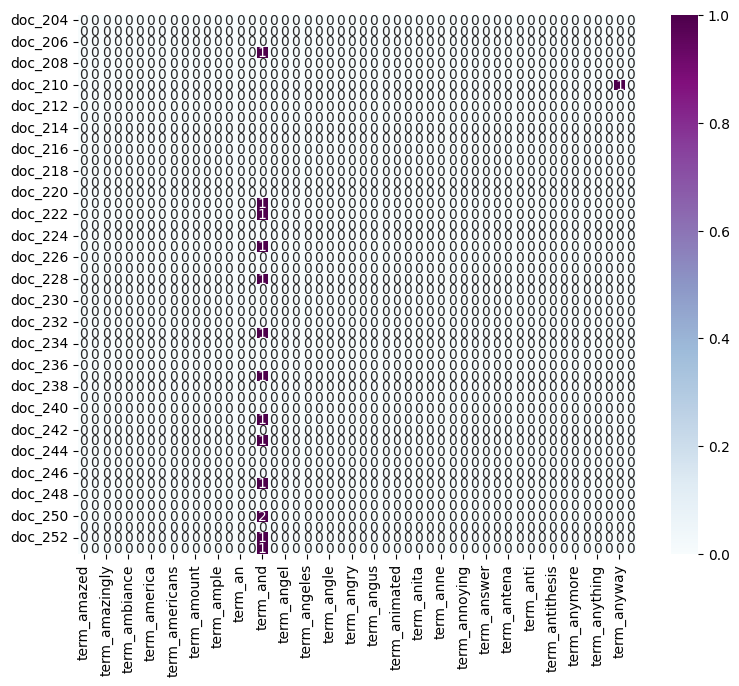

In [387]:
import seaborn as sns

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[200:250]]
# print(plot_x)

plot_y = ["doc_"+ str(i) for i in list(X.index)[200:250]]
# print(plot_y)

plot_z = X_counts[200:250, 200:250].toarray() 
# print(plot_z)

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
# display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="BuPu",
                 vmin=0, vmax=1, annot=True)

In [388]:
from sklearn.decomposition import PCA

print(X_counts.shape)

X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
print(X_reduced.shape)

(2966, 5153)
(2966, 2)


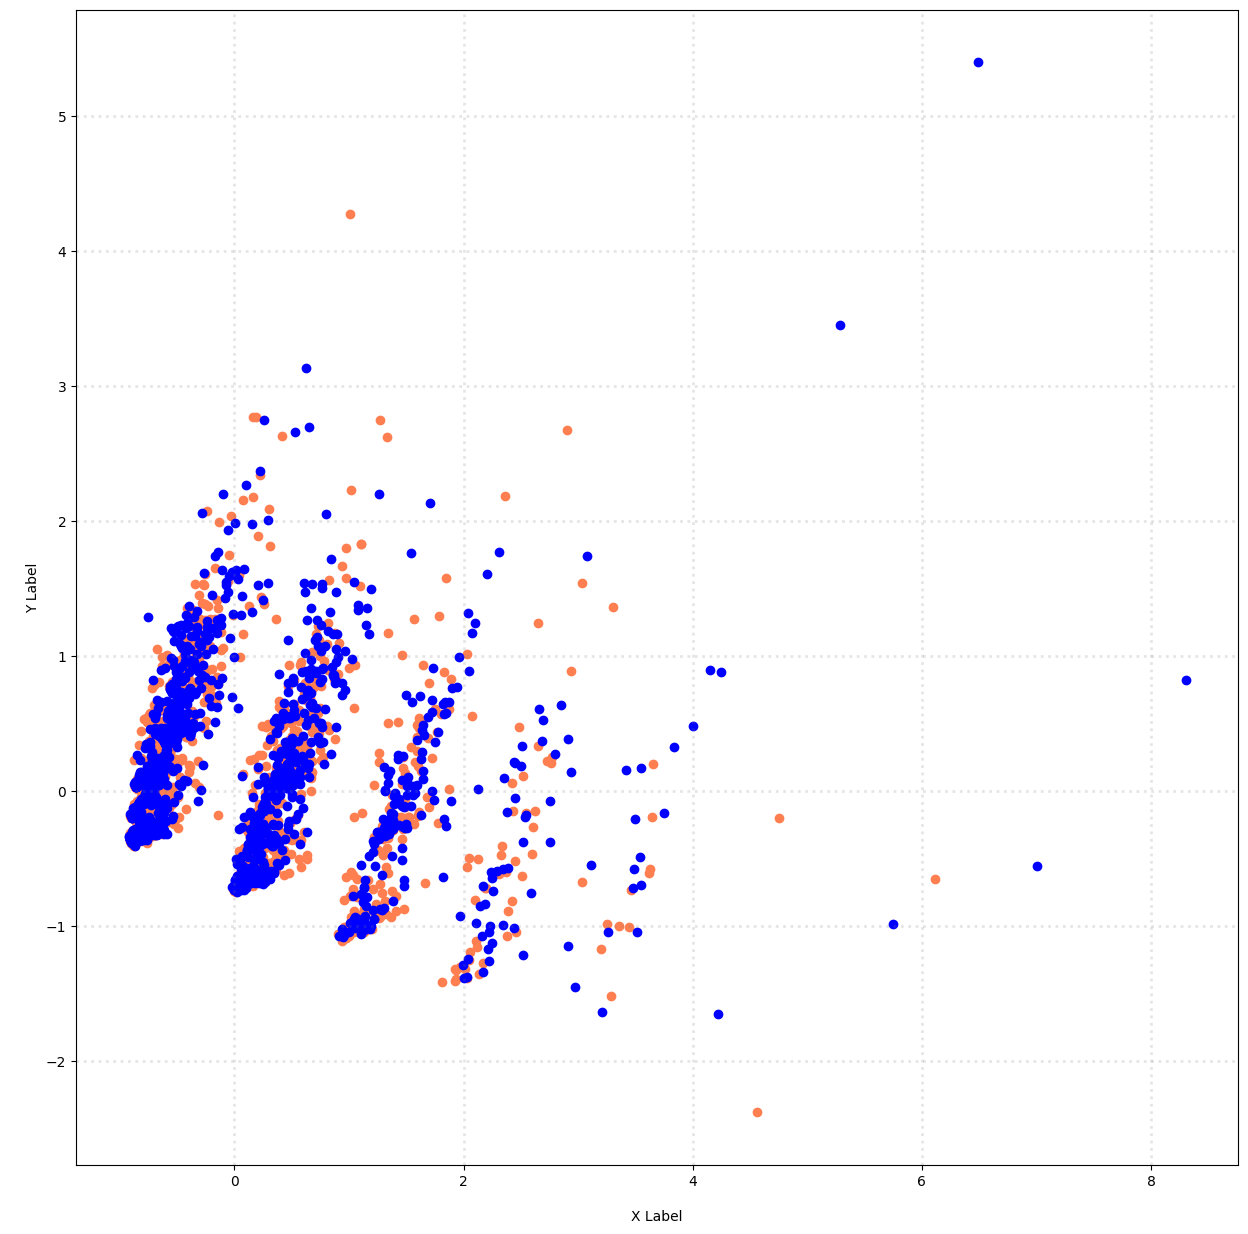

In [389]:
col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (15,15))
ax = fig.subplots()

for c, score in zip(col, scores):
    xs = X_reduced[X['score'] == score].T[0]
    ys = X_reduced[X['score'] == score].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [390]:
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced.shape)

(2966, 3)


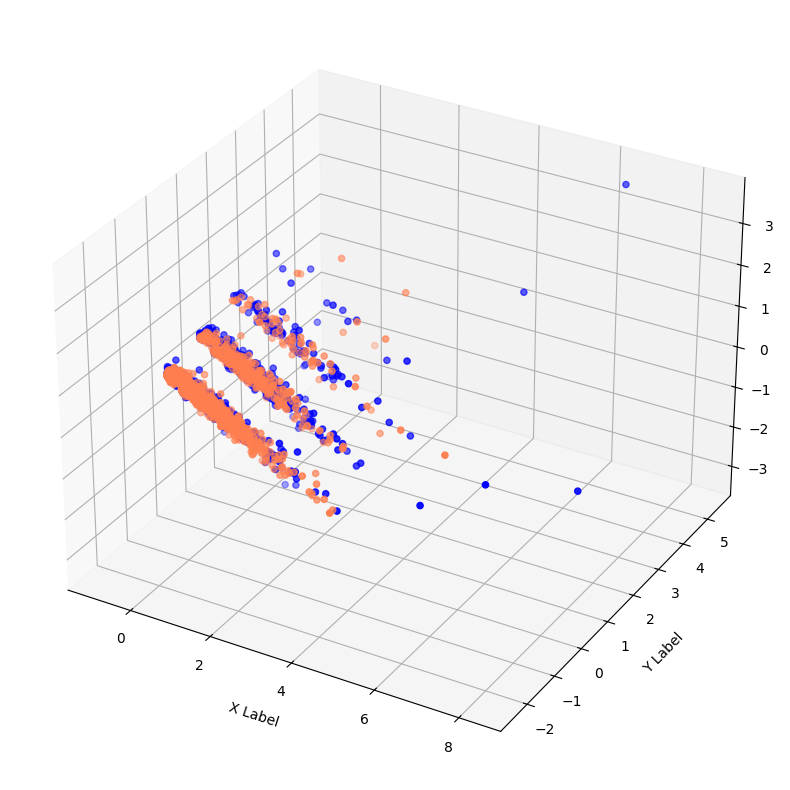

In [391]:
# plot
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = '3d')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')


for c, score in zip(col, scores):
    xs = X_reduced[X['score'] == score].T[0]
    ys = X_reduced[X['score'] == score].T[1]
    zs = X_reduced[X['score'] == score].T[2]
    
    ax.scatter3D(xs, ys, zs, c = c, marker='o')

ax.view_init()
plt.show()

In [392]:
term_frequencies = []
# print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
print(term_frequencies)

[ 1 34  3 ...  1  2  1]


In [393]:
import plotly.express as plot_ex

data = {
    'Terms': count_vect.get_feature_names_out()[:300],
    'Frequencies': term_frequencies[:300]
}
df = pd.DataFrame(data)

fig = plot_ex.bar(df, x='Terms', y='Frequencies')
fig.update_xaxes(tickangle=90)

fig.show()

In [394]:
# If I want to visualize terms with frequency > 100
num = 100

filtered_data = {
    'Terms': [term for term, freq in zip(count_vect.get_feature_names_out(), term_frequencies) if freq > num],
    'Frequencies': [freq for freq in term_frequencies if freq > num]
}
df_filtered = pd.DataFrame(filtered_data)

fig = plot_ex.bar(df_filtered, x='Terms', y='Frequencies')
fig.update_xaxes(tickangle=90)

fig.show()

In [395]:
sorted_terms = [term for _, term in sorted(zip(term_frequencies, count_vect.get_feature_names_out()), reverse=True)]
sorted_frequencies = sorted(term_frequencies, reverse=True)

data = {
    'Terms': sorted_terms[0:300],
    'Frequencies': sorted_frequencies[0:300]
}
df = pd.DataFrame(data)

fig = plot_ex.bar(df, x='Terms', y='Frequencies')
fig.update_xaxes(tickangle=90)

fig.show()

In [396]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

/var/folders/fl/wf8xm4zj4ys86xmzmk4mp9zm0000gn/T/ipykernel_64946/1516414146.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


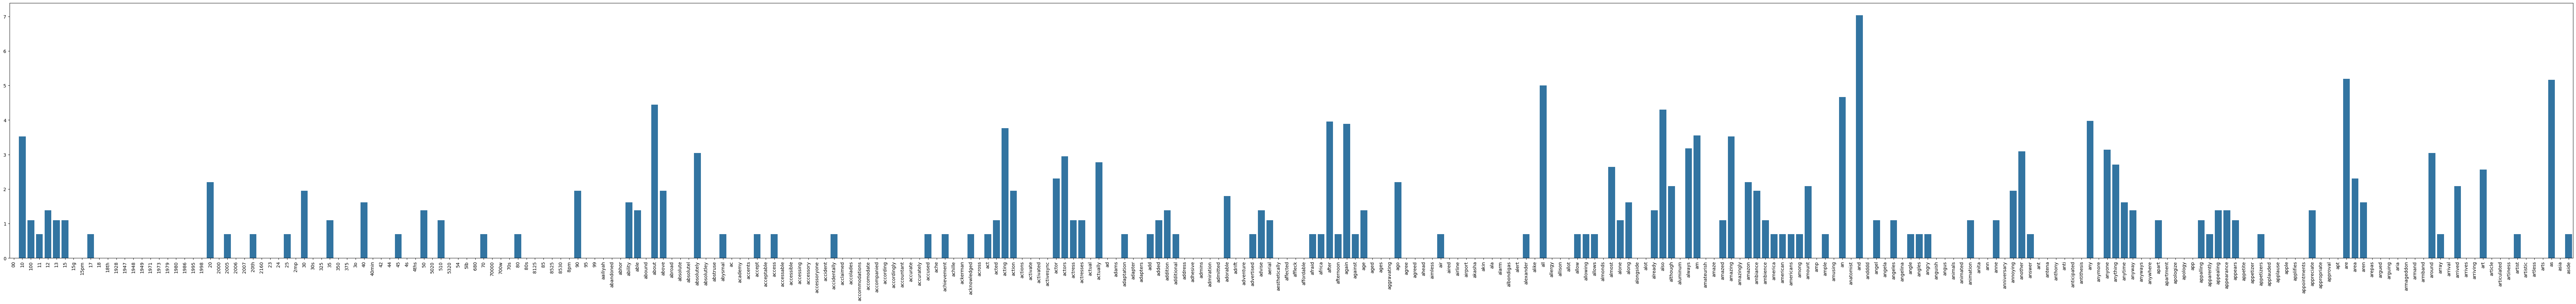

In [397]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

In [398]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()

In [399]:
print(X.category)
mlb.fit(X.category)

0        negtive
1       positive
2       positive
3        negtive
4       positive
          ...   
2995     negtive
2996     negtive
2997     negtive
2998     negtive
2999     negtive
Name: category, Length: 2966, dtype: object


LabelBinarizer()

In [400]:
X['bin_category'] = mlb.transform(X['category'])
X[0:20]

,text,score,category,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,negtive,"[So, there, is, no, way, for, me, to, plug, it...",0
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]",1
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]",1
3,Tied to charger for conversations lasting more...,0,negtive,"[Tied, to, charger, for, conversations, lastin...",0
4,The mic is great.,1,positive,"[The, mic, is, great, .]",1
5,I have to jiggle the plug to get it to line up...,0,negtive,"[I, have, to, jiggle, the, plug, to, get, it, ...",0
6,If you have several dozen or several hundred c...,0,negtive,"[If, you, have, several, dozen, or, several, h...",0
7,If you are Razr owner...you must have this!,1,positive,"[If, you, are, Razr, owner, ..., you, must, ha...",1
8,"Needless to say, I wasted my money.",0,negtive,"[Needless, to, say, ,, I, wasted, my, money, .]",0
9,What a waste of money and time!.,0,negtive,"[What, a, waste, of, money, and, time, !, .]",0


## 5. Data Exploration

In [401]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [402]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [403]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [404]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/var/folders/fl/wf8xm4zj4ys86xmzmk4mp9zm0000gn/T/ipykernel_64946/452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/fl/wf8xm4zj4ys86xmzmk4mp9zm0000gn/T/ipykernel_64946/452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/fl/wf8xm4zj4ys86xmzmk4mp9zm0000gn/T/ipykernel_64946/452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/fl/wf8xm4zj4ys86xmzmk4mp9zm0000gn/T/ipykernel_64946/452772485.py:17: Dep

# Part 3

## 1. New Data Visualization

In [405]:
# Check the dataset
print(X[:20])

                                                 text score  category  \
0   So there is no way for me to plug it in here i...     0   negtive   
1                         Good case, Excellent value.     1  positive   
2                              Great for the jawbone.     1  positive   
3   Tied to charger for conversations lasting more...     0   negtive   
4                                   The mic is great.     1  positive   
5   I have to jiggle the plug to get it to line up...     0   negtive   
6   If you have several dozen or several hundred c...     0   negtive   
7         If you are Razr owner...you must have this!     1  positive   
8                 Needless to say, I wasted my money.     0   negtive   
9                    What a waste of money and time!.     0   negtive   
10                    And the sound quality is great.     1  positive   
11  He was very impressed when going from the orig...     1  positive   
12  If the two were seperated by a mere 5+ ft I st.

In [406]:
# Reset index
X.reset_index(drop=True, inplace=True)
print(X[:20])

                                                 text score  category  \
0   So there is no way for me to plug it in here i...     0   negtive   
1                         Good case, Excellent value.     1  positive   
2                              Great for the jawbone.     1  positive   
3   Tied to charger for conversations lasting more...     0   negtive   
4                                   The mic is great.     1  positive   
5   I have to jiggle the plug to get it to line up...     0   negtive   
6   If you have several dozen or several hundred c...     0   negtive   
7         If you are Razr owner...you must have this!     1  positive   
8                 Needless to say, I wasted my money.     0   negtive   
9                    What a waste of money and time!.     0   negtive   
10                    And the sound quality is great.     1  positive   
11  He was very impressed when going from the orig...     1  positive   
12  If the two were seperated by a mere 5+ ft I st.

In [407]:
analyze = count_vect.build_analyzer()
X['stopwords removal'] = [0] * len(X)
for i in range(0, len(X)):  
    X['stopwords removal'][i] = analyze(X.text[i])

X

/var/folders/fl/wf8xm4zj4ys86xmzmk4mp9zm0000gn/T/ipykernel_64946/2057287274.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/fl/wf8xm4zj4ys86xmzmk4mp9zm0000gn/T/ipykernel_64946/2057287274.py:4: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['so', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'in', 'here', 'in', 'the', 'us', 'unless', 'go', 'by', 'converter']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



,text,score,category,unigrams,bin_category,stopwords removal
0,So there is no way for me to plug it in here i...,0,negtive,"[So, there, is, no, way, for, me, to, plug, it...",0,"[so, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]",1,"[good, case, excellent, value]"
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]",1,"[great, for, the, jawbone]"
3,Tied to charger for conversations lasting more...,0,negtive,"[Tied, to, charger, for, conversations, lastin...",0,"[tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,positive,"[The, mic, is, great, .]",1,"[the, mic, is, great]"
...,...,...,...,...,...,...
2961,I think food should have flavor and texture an...,0,negtive,"[I, think, food, should, have, flavor, and, te...",0,"[think, food, should, have, flavor, and, textu..."
2962,Appetite instantly gone.,0,negtive,"[Appetite, instantly, gone, .]",0,"[appetite, instantly, gone]"
2963,Overall I was not impressed and would not go b...,0,negtive,"[Overall, I, was, not, impressed, and, would, ...",0,"[overall, was, not, impressed, and, would, not..."
2964,"The whole experience was underwhelming, and I ...",0,negtive,"[The, whole, experience, was, underwhelming, ,...",0,"[the, whole, experience, was, underwhelming, a..."


In [408]:
# Classify the dataset into POS ans NEG

pos_df = X[X['score'] == '1'][['text', 'stopwords removal']]
neg_df = X[X['score'] == '0'][['text', 'stopwords removal']]

pos_df
# neg_df

,text,stopwords removal
1,"Good case, Excellent value.","[good, case, excellent, value]"
2,Great for the jawbone.,"[great, for, the, jawbone]"
4,The mic is great.,"[the, mic, is, great]"
7,If you are Razr owner...you must have this!,"[if, you, are, razr, owner, you, must, have, t..."
10,And the sound quality is great.,"[and, the, sound, quality, is, great]"
...,...,...
2865,"Overall, a great experience.","[overall, great, experience]"
2867,Their regular toasted bread was equally satisf...,"[their, regular, toasted, bread, was, equally,..."
2873,The chips and sals a here is amazing!!!!!!!!!!...,"[the, chips, and, sals, here, is, amazing]"
2875,This is my new fav Vegas buffet spot.,"[this, is, my, new, fav, vegas, buffet, spot]"


In [409]:
pos_df.reset_index(drop=True, inplace=True)
neg_df.reset_index(drop=True, inplace=True)
print(len(pos_df))
print(len(neg_df))

1480
1486


In [410]:
from wordcloud import WordCloud

pos_text = ' '.join(pos_df['text'])
pos_text = analyze(pos_text)
pos_text = ' '.join(pos_text)
# print(pos_text)

neg_text = ' '.join(neg_df['text'])
neg_text = analyze(neg_text)
neg_text = ' '.join(neg_text)
# print(neg_text)

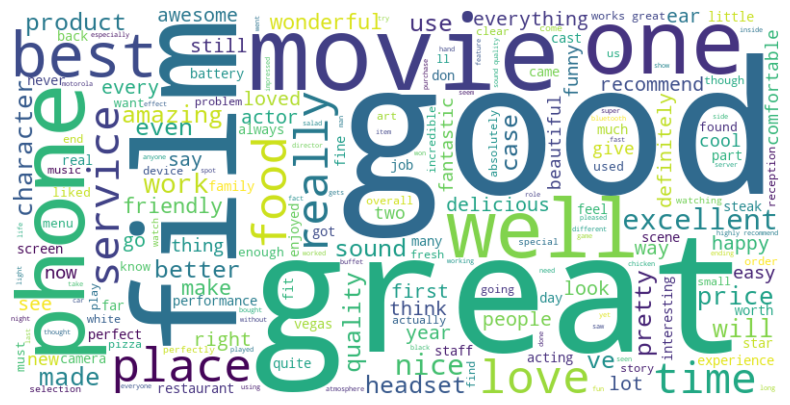

In [411]:
# Generate a wordcloud for positive dataset
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(pos_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

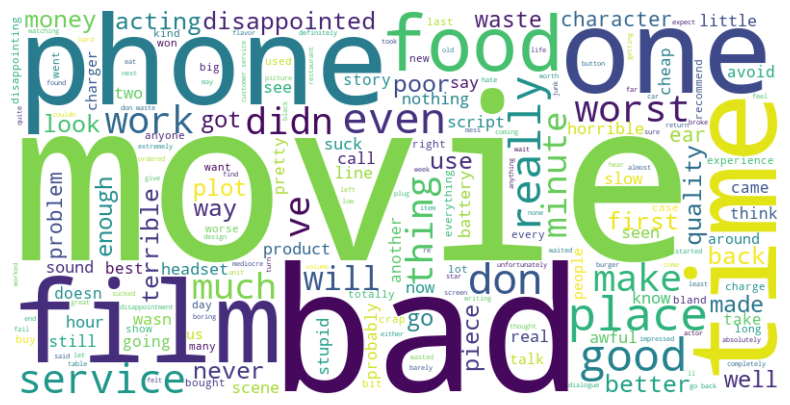

In [412]:
# Generate a wordcloud for negtive dataset
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neg_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 2. TF-IDF Features

In [413]:
X

,text,score,category,unigrams,bin_category,stopwords removal
0,So there is no way for me to plug it in here i...,0,negtive,"[So, there, is, no, way, for, me, to, plug, it...",0,"[so, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]",1,"[good, case, excellent, value]"
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]",1,"[great, for, the, jawbone]"
3,Tied to charger for conversations lasting more...,0,negtive,"[Tied, to, charger, for, conversations, lastin...",0,"[tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,positive,"[The, mic, is, great, .]",1,"[the, mic, is, great]"
...,...,...,...,...,...,...
2961,I think food should have flavor and texture an...,0,negtive,"[I, think, food, should, have, flavor, and, te...",0,"[think, food, should, have, flavor, and, textu..."
2962,Appetite instantly gone.,0,negtive,"[Appetite, instantly, gone, .]",0,"[appetite, instantly, gone]"
2963,Overall I was not impressed and would not go b...,0,negtive,"[Overall, I, was, not, impressed, and, would, ...",0,"[overall, was, not, impressed, and, would, not..."
2964,"The whole experience was underwhelming, and I ...",0,negtive,"[The, whole, experience, was, underwhelming, ,...",0,"[the, whole, experience, was, underwhelming, a..."


In [414]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words = 'english')
tfidf_matrix = tfidf_vectorizer.fit_transform(X['text'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# print(tfidf_df)


## 3. Naive Bayes Classifier

In [415]:
X

,text,score,category,unigrams,bin_category,stopwords removal
0,So there is no way for me to plug it in here i...,0,negtive,"[So, there, is, no, way, for, me, to, plug, it...",0,"[so, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]",1,"[good, case, excellent, value]"
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]",1,"[great, for, the, jawbone]"
3,Tied to charger for conversations lasting more...,0,negtive,"[Tied, to, charger, for, conversations, lastin...",0,"[tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,positive,"[The, mic, is, great, .]",1,"[the, mic, is, great]"
...,...,...,...,...,...,...
2961,I think food should have flavor and texture an...,0,negtive,"[I, think, food, should, have, flavor, and, te...",0,"[think, food, should, have, flavor, and, textu..."
2962,Appetite instantly gone.,0,negtive,"[Appetite, instantly, gone, .]",0,"[appetite, instantly, gone]"
2963,Overall I was not impressed and would not go b...,0,negtive,"[Overall, I, was, not, impressed, and, would, ...",0,"[overall, was, not, impressed, and, would, not..."
2964,"The whole experience was underwhelming, and I ...",0,negtive,"[The, whole, experience, was, underwhelming, ,...",0,"[the, whole, experience, was, underwhelming, a..."


### MultinomialNB

#### Using TF-IDF Features

In [416]:
from sklearn.model_selection import train_test_split
a = tfidf_df.values
b = X['category']
# print(a, b)


In [417]:
X_train, X_test, y_train, y_test = train_test_split(a, b, test_size = 0.20, random_state = 82)

In [418]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [419]:
y_pred = classifier.predict(X_test)
# print(y_pred)

In [420]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

TP = cm[0][0]
FN = cm[0][1]
FP = cm[0][0]
TN = cm[0][1]

precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1_score = 2 * precision * recall / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", F1_score)
print("Accuracy score:", accuracy_score(y_test, y_pred))


[[233  59]
 [ 55 247]]
Precision: 0.5
Recall: 0.797945205479452
F1 score: 0.6147757255936676
Accuracy score: 0.8080808080808081


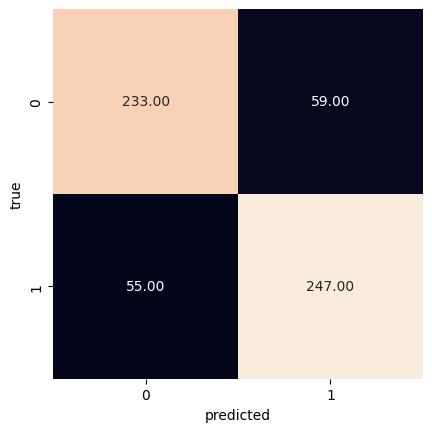

In [421]:
# Plot the confusion matrix
sns.heatmap(cm, square= True, annot=True, cbar= False, fmt='.2f')
plt.xlabel("predicted")
plt.ylabel("true")
plt.show()

#### Using Word Frequency Features

In [422]:
a = X_counts.toarray()
b = X['category']
# print(a, b)

In [423]:
X_train, X_test, y_train, y_test = train_test_split(a, b, test_size = 0.20, random_state = 82)

In [424]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [425]:
y_pred = classifier.predict(X_test)
# print(y_pred)

In [426]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

TP = cm[0][0]
FN = cm[0][1]
FP = cm[0][0]
TN = cm[0][1]

precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1_score = 2 * precision * recall / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", F1_score)
print("Accuracy score:", accuracy_score(y_test, y_pred))

[[250  42]
 [ 63 239]]
Precision: 0.5
Recall: 0.8561643835616438
F1 score: 0.6313131313131313
Accuracy score: 0.8232323232323232


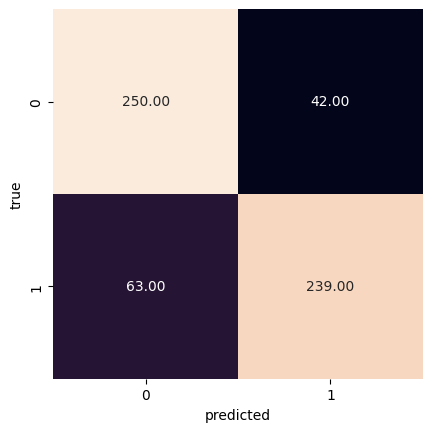

In [427]:
# Plot the confusion matrix
sns.heatmap(cm, square= True, annot=True, cbar= False, fmt='.2f')
plt.xlabel("predicted")
plt.ylabel("true")
plt.show()

### GaussianNB

#### Using TF-IDF Features

In [428]:
a = tfidf_df.values
b = X['category']
# print(a, b)

In [429]:
X_train, X_test, y_train, y_test = train_test_split(a, b, test_size = 0.20, random_state = 82)

In [430]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [431]:
y_pred = classifier.predict(X_test)
# print(y_pred)

In [432]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

TP = cm[0][0]
FN = cm[0][1]
FP = cm[0][0]
TN = cm[0][1]

precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1_score = 2 * precision * recall / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", F1_score)
print("Accuracy score:", accuracy_score(y_test, y_pred))

[[231  61]
 [126 176]]
Precision: 0.5
Recall: 0.791095890410959
F1 score: 0.6127320954907162
Accuracy score: 0.6851851851851852


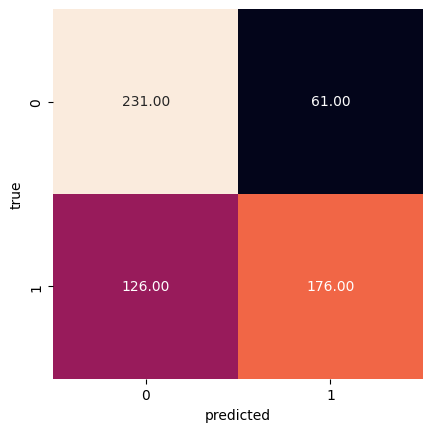

In [433]:
# Plot the confusion matrix
sns.heatmap(cm, square= True, annot=True, cbar= False, fmt='.2f')
plt.xlabel("predicted")
plt.ylabel("true")
plt.show()

#### Using Word Frequency Features

In [434]:
a = X_counts.toarray()
b = X['category']
# print(a, b)

In [435]:
X_train, X_test, y_train, y_test = train_test_split(a, b, test_size = 0.20, random_state = 82)

In [436]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [437]:
y_pred = classifier.predict(X_test)
# print(y_pred)

In [438]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

TP = cm[0][0]
FN = cm[0][1]
FP = cm[0][0]
TN = cm[0][1]

precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1_score = 2 * precision * recall / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", F1_score)
print("Accuracy score:", accuracy_score(y_test, y_pred))

[[247  45]
 [154 148]]
Precision: 0.5
Recall: 0.8458904109589042
F1 score: 0.628498727735369
Accuracy score: 0.664983164983165


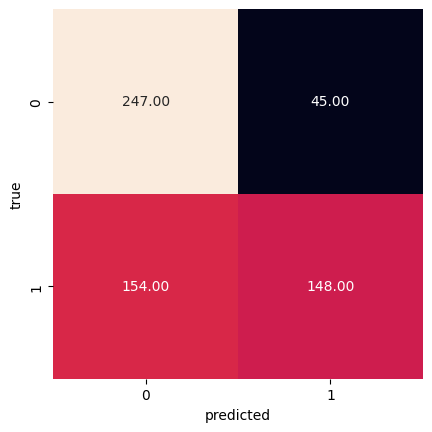

In [439]:
# Plot the confusion matrix
sns.heatmap(cm, square= True, annot=True, cbar= False, fmt='.2f')
plt.xlabel("predicted")
plt.ylabel("true")
plt.show()

### Conclusion

**Accuracy Score**

Multinomial NB classifier using TF-IDF features: 0.8080808080808081

Multinomial NB classifier using word frequency features: 0.8232323232323232

Gaussian NB classifier using TF-IDF features: 0.6851851851851852

Gaussian NB classifier using word frequency features: 0.664983164983165

**The differences between using TF-IDF features and using word frequency features with two different classifiers**

Using word frequency features to build Multinomial NB classifier has higher accuracy score than using TF-IDF features.

It means when performing analysis on this dataset, the choice of word frequency features as input for a Multinomial NB 

classifier resulted in better classification accuracy when compared to using TF-IDF features.

However,  when using TF-IDF features to build Gaussian NB classifier has higher accuracy score than using word frequency 

features. It means when performing analysis on this dataset, the choice of TF-IDF features as input for a Gaussian NB 

classifier resulted in better classification accuracy when compared to using word frequency features.

Furthermore, on this dataset, the combinaiton of Multinomial NB classifier using word frequency features can contribute

to the best accuracy score.

# Part 4

**Observations**

***1.***

In lab section 5.3 Feature subset selection, we used `count_vect.build_analyzer()` to remove stopwords of the text. 

But if we set the parameter 'stop_words' when initializing the TF-IDF vectorizer 

`tfidf_vectorizer = TfidfVectorizer(stop_words = 'english')`, then we can generate TF-IDF result directly 

using text without removing stopwords instead of using the data after removing stopwords (need one more step).

***2.***

In lab section 5.4 Dimensionality Reduction, when comparing reducing the dimension to 2D with reducing the dimension 

to 3D, it becomes evident that the latter option provides clearer and more accurate interpretations.

With the 3D visualization, we can observe the data from various angles, allowing for a more precise the distances 

between data points.

***3.***

In lab section 5.5 Attribute Transformation / Aggregation, although I reduced the number of terms to visualize (only 

capture terms with frequency > 1000), as the figure result shown, there are still lots of stopwords in the term list. 

Therefore, I think we can remove stopwords before filtering the data, then the result would be more concise and meaningful.




